# Jupyter и продвинутая консоль
---

## IPython
По сравнению с другими языками программирования у питона есть одно неоспоримое преимущество:
Он поддерживает динамическое исполнение кода, позволяя менять программу буквально на лету и
уменьшая время между написанием и запуском кода, что так необходимо в исследовательской деятельности
и практических вычислениях.

Но те, кто пользовался стандартным интерпретатором питона, скажет, что пользоваться то им не так уж и удобно.
Именно по этой причине и появился проект **IPython**.

Это интерпретатор питона, снабжённый дополнительными функциями, малый список которых:
* Встроенная справка по функциям и пакетам
* Автодополнение кода
* Запоминание введённых команд и их ассоциированного результата выполнения
* Пошаговая отладка выполнения
* Вывод стека ошибок

Данная консоль сейчас является наилучшим вариантом работы с питоном, как инструментом для быстрого прототипирования,
тестирования и выполнения вычислений.

Но это ещё не всё.

## Jupyter
Jupyter Notebook — невероятно мощный инструмент для интерактивной разработки и представления проектов в области наук о данных.
Блокнот объединяет код и его вывод в единый документ, который объединяет визуализацию, повествовательный текст, математические уравнения и другие мультимедиа.
Этот интуитивно понятный рабочий процесс способствует итеративной и быстрой разработке, что делает блокнот все более популярным выбором для представления данных и их анализа.
Файлы jupyter notebook имеют расширение *.ipynb*, что расшифровывается Interactive Python NoteBook.
В настоящее время существует много сред разработки:

Локальные редакторы:
* Jupyter Notebook(стандартная реализация)
* DataSpell
* PyCharm Professional
* Visual Studio Code (с установленным плагином)

Удаленные редакторы:
* Google Colab (c бесплатным GPU)
* Kaggle (c бесплатным GPU)
* DataLore

# Математические пакеты в Python
___

## Numpy

В python, как, собственно, и во многих других языках программирования, существуют
стандартные типы для создания массивов данных.
Однако python, как динамически типизируемый язык, не позволяет удобно оперировать такими данными
в контексте математических вычислений (например, сложить два вектора).
По этой причине и появилась библиотека, которая стала негласным стандартом математических вычислений
с векторами и матрицами -- __*numpy*__.

Данная библиотека предоставляет основной объект, с помощью которого и осуществляется вся работа:
`ndarray` -- многомерный массив, который приходит на замену питоновским спискам, когда речь идет о серьезных
математических вычислениях.

Ниже мы рассмотрим различия в эффективности работы стандартных списков и многомерных массивов.
Они различаются по скорости доступа к ее элементам и объему занимаемой
оперативной памяти.

Во многом это связано с тем, что в списках можно хранить элементы разных типов данных.


In [46]:
a = [1, 's', '234', 3.4]

Это удобно, но не эффективно, особенно когда речь заходит о хранении нескольких миллионов значений одинакового типа.

Воспользуемся библиотекой `sys`, в которой есть функция `getsizeoff()`, которая позволит нам узнать сколько
оперативной памяти занимает список из 1 миллиона значений.

In [55]:
import sys

length = 1000000
lst = [1 for _ in range(length)]  # один из способов заполнения списков. Он называется List Comprehension
print(f'Список занимает {sys.getsizeof(lst) // 8 // 1024} Мбайт')

Список занимает 1031 Мбайт


А теперь давайте преобразуем наш список в массив при помощи библиотеки `numpy`

In [56]:
# Считается традицией импортировать numpy с названием np
# Поэтому если вы увидете где-нибудь вызов функции модуля np, скорее всего это numpy
import numpy as np

arr = np.array(lst)  # преобразуем список в массив numpy
#arr = arr.astype(np.int32)
print(f'Массив занимает {sys.getsizeof(arr) // 8 // 1024} Мбайт')
print(arr.dtype)

Массив занимает 488 Мбайт
int32


Проверим, чему равно преимущество по памяти в процентах:

In [57]:
ratio = round(100 - (sys.getsizeof(arr) / sys.getsizeof(lst)) * 100, 2)
print(f'Массив занимает пямяти на {ratio}% меньше, чем список')

Массив занимает пямяти на 52.65% меньше, чем список


Да, кажется, что 8% это немного, но что если нам необходимо хранить 10 миллионов значений? 20 или 30 миллионов значений?
Плюс к этому в зависимости от данных разница может и измениться в большую сторону. Поэтому при помощи `numpy` получается
сэкономить порядочное количество памяти, потому что его массивы **статические** по памяти

### Создание массивов

Для создания многомерного массива могут использоваться различные функции, предоставляемые `numpy`.
Разберем самые популярные: 

#### `np.array`
Создание массива из списка:

In [59]:
# Просто конвертируем список в массив
arr1 = np.array([1, 2, 3, 4, 5])
print(arr1)

[1 2 3 4 5]
int32


#### `np.zeros`
Создание массива заданной размерности, состоящего только из нулей

*Размерность для `numpy` массива - это кортеж, в котором заданно количество элементов на каждой оси
Например если мы задаем размерность массива (10,20), можно сказать что мы создаем двухмерный массив 10 на 20*

In [61]:
# Создаем двумерный массив полностью из нулей размером 5х8
# Для этого в аргументы функции необходимо передать кортеж shape - форму массива
arr2 = np.zeros((5, 8))
print(arr2)

[0 0 0 0 0]


#### `np.ones`
Создание массива заданной размерности, состоящего только из единиц

In [63]:
# Создаем трехмерный массив полностью из единиц размером 2x3x4
arr3 = np.ones((2, 3, 4))
print(arr3)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


#### `np.random.random`
Создание массива заданной размерности, заполненного случайными дробными числами от 0 до 1

In [62]:
# Создаем массив размером 10 элементов из случайных float значений от 0 до 1
arr4 = np.random.random(10)
print(arr4)

[0.69397466 0.59063611 0.80743949 0.57272711 0.10752452 0.30883344
 0.50219575 0.69011692 0.92925963 0.18550205]


#### `np.arange`
Создание массива заданной размерности из перечисления целых чисел, начиная с нуля

In [65]:
# Создаем массив из перечисления целых чисел, начиная с нуля, размером 15
arr5 = np.arange(15)
print(arr5)

[ 3  4  5  6  7  8  9 10 11 12 13 14]


### Операции с массивами

Не смотря на то, что нельзя изменять размер `numpy` массивов, мы можем менять их элементы. В `numpy` реализована
очень "мощная" система индексинга элементов. Давайте рассмотрим примеры изменения массивов:

Создаем массив

In [66]:
arr = np.arange(10)

Изменение одного элемента массива


In [67]:
arr[0] = 10
print(arr)

[10  1  2  3  4  5  6  7  8  9]


Изменение нескольких элементов массива по диапазону индексов от 1 до 4


In [68]:
arr[1:4] = 5
print(arr)

[10  5  5  5  4  5  6  7  8  9]


Также мы можем изменять элементы по одной или нескольким осям в многомерном массиве

In [69]:
arr2d = np.zeros((4, 10))
print(arr2d)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Присвоим всему первому ряду в двумерном массиве значение 2

In [70]:
arr2d[0] = 2
print(arr2d)

[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Присвоим всему первому столбцу в двумерном массиве значение 4

In [71]:
arr2d[:, 0] = 4
print(arr2d)

[[4. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Присвоим значение 6 последним 5 элементам 2 строки массива


In [72]:
arr2d[1, -5:] = 6
print(arr2d)

[[4. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [4. 0. 0. 0. 0. 6. 6. 6. 6. 6.]
 [4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Присвоим значение -1 "квадратику" в массиве с второго по третий ряд и cо четвертого по пятый столбик


In [73]:
arr2d[1:3, 3:5] = -1
arr2d

array([[ 4.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 4.,  0.,  0., -1., -1.,  6.,  6.,  6.,  6.,  6.],
       [ 4.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Присвоим последней строчке значения элементов одномерного массива,который мы создали ранее

In [74]:
arr2d[3] = arr
arr2d

array([[ 4.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 4.,  0.,  0., -1., -1.,  6.,  6.,  6.,  6.,  6.],
       [ 4.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [10.,  5.,  5.,  5.,  4.,  5.,  6.,  7.,  8.,  9.]])

Для многомерных массивов определены многие математические операции (+, -, /, * и др.) и сервисные функции (max, min и др.).

Создадим 2 двумерных массива

In [75]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])
b = np.array([[5, 5, 5],
              [5, 5, 5]])

С массивом можно совершать все 4 основные арифметические операции с одним значением:

In [76]:
print(a + 5)
print(a - 5)
print(a * 5)
print(a / 5)

[[ 6  7  8]
 [ 9 10 11]]
[[-4 -3 -2]
 [-1  0  1]]
[[ 5 10 15]
 [20 25 30]]
[[0.2 0.4 0.6]
 [0.8 1.  1.2]]


Сложение двух массивов поэлементно:

In [77]:
a + b

array([[ 6,  7,  8],
       [ 9, 10, 11]])

Вычитание одного массива из другого также происходит поэлементно:

In [78]:
a - b

array([[-4, -3, -2],
       [-1,  0,  1]])

Поэлементное умножение:

In [79]:
a * b

array([[ 5, 10, 15],
       [20, 25, 30]])

Матричное умножение:

In [82]:
c = np.array([[1, 2], [3, 4], [5, 6]])
np.dot(a, c)
c1 = a @ c
c1

array([[22, 28],
       [49, 64]])

Поэлеметное деление:

In [83]:
a / b

array([[0.2, 0.4, 0.6],
       [0.8, 1. , 1.2]])

Извлечение максимума из массива:

In [84]:
a.max()

6

Извлечение минимума из массива:

In [85]:
a.min()

1

In [104]:
arr = np.array([1,2,3,4,5])
arr[3] = 5.7
print(arr.dtype)
print((arr * 2.5).dtype)

array([ 2.5,  5. ,  7.5, 12.5, 12.5])

На базе данной библиотеки, реализующей базовые операции с векторами и матрицами, было создано множество
прикладных математических библиотек, которые мы сейчас рассмотрим.

## Matplotlib

В настоящее время в питоне существует множество библиотек для визуализации данных. Самыми популярными являются matplotlib и seaborn.
В основном мы будем использовать matplotlib, поэтому остановимся на нем более детально.

*Matplotlib* -- библиотека на языке программирования Python для визуализации данных двумерной (2D) графикой (3D графика также поддерживается).

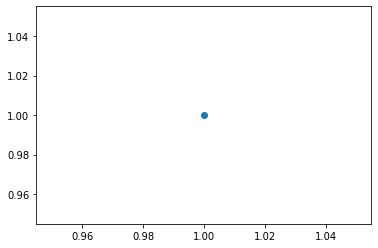

In [86]:
import matplotlib.pyplot as plt

plt.scatter(1.0, 1.0)  # функция по отрисовке точки по координатам x, y

plt.savefig("first_example.png")  # пример сохраниения построенного графика

plt.show()  # вывод получившигося графика (в jupiter необязательное действие)


Давайте теперь построим график функции:
Для этого нам нужен диапазон значений x и функция, которая будет возращать значение y (для примера возьмем sin из numpy)

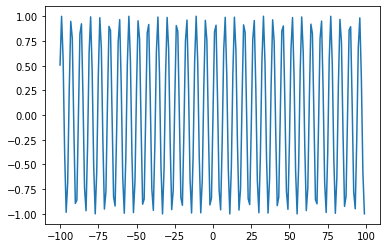

In [87]:
x = range(-100, 100)
plt.plot(x, np.sin(x))
plt.show()

Получилась синусойда курильщика 😉.
На самом деле проблема в том, что стандартная функция range позволяет генерировать диапазоны только целых чисел, что для большей части математических задач мало пригодно
Воспользуемся функцией arange из numpy, которая генерирует любые диапазоны чисел.
arange(начало диапазона, конец диапазона, шаг)

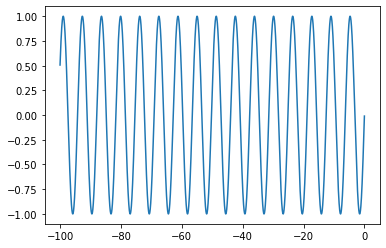

In [89]:
x = np.arange(-100, 0, 0.01)
plt.plot(x, np.sin(x))
plt.show()

Также нам могут потребоваться гистограммы, их реализация в matplotlib крайне простая:

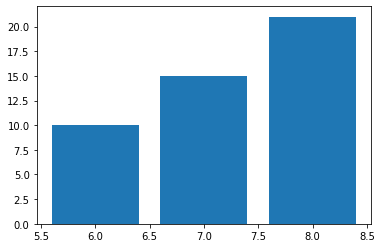

In [90]:
import matplotlib.pyplot as plt

plt.bar([6, 7, 8], [10, 15, 21])
plt.show()

По аналогии горизонтальная гистограмма:

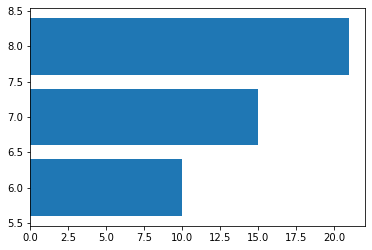

In [91]:
import matplotlib.pyplot as plt

plt.barh([6, 7, 8], [10, 15, 21])
plt.show()

Вы знаете, что обычно для визуализации процентного отношений обычно используют круговую диаграмму.

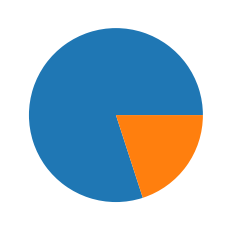

In [92]:
import matplotlib.pyplot as plt

plt.pie([40, 10])
plt.show()

Давайте более подробно остановимся на именовании получаемого графика:

<img src="lesson_2/mpl_anatomy.jpg" alt=""/>
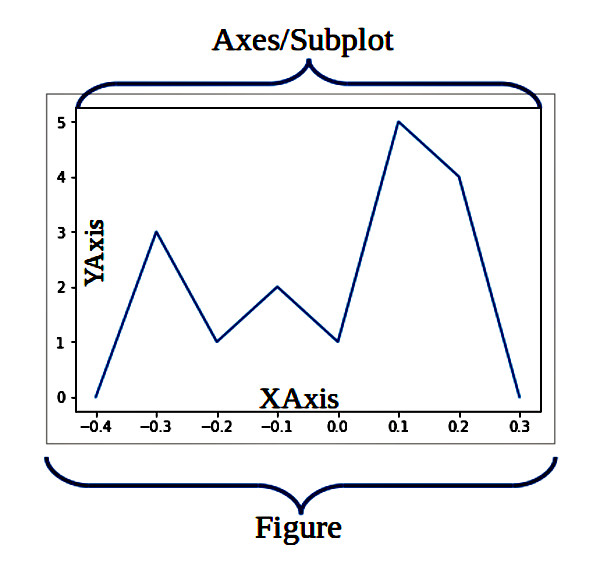

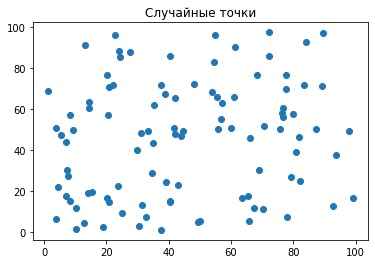

In [93]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = 100 * np.random.rand(100)  #  координаты 'x'
y = 100 * np.random.rand(100)  #  координаты 'y'

ax.scatter(x, y)  #  метод, отображающий данные в виде точек
#  на плоскости

ax.set(title='Случайные точки')  #  метод, размещающий заголовок
#  над "Axes"
plt.show()

Разберем ситуации, когда у нас есть необходимость построения нескольких графиков одновременно:

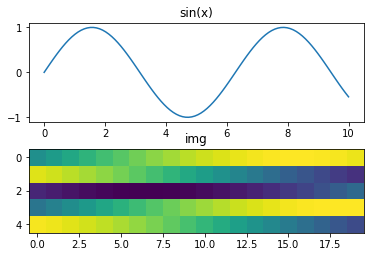

In [94]:
import numpy as np
import matplotlib.pyplot as plt

#  Данные:
x = np.linspace(0, 10, 100)
y = np.sin(x)
img = y.reshape(5, 20)

#  Создаем "Figure" и "Axes":
fig = plt.figure()

ax_1 = fig.add_subplot(2, 1, 1)
ax_2 = fig.add_subplot(2, 1, 2)

#  Методы, отображающие данные:
ax_1.plot(x, y)
ax_2.imshow(img)

#  Добавление заголовков:
ax_1.set(title='sin(x)')
ax_2.set(title='img')

plt.show()

Также при работе с картинками иногда возникает необходимость быстрой визуализации этих картинок. Matplotlib способен и на это
Воспользуемся функцией imread из библиотеки skinage.io для загрузки изображения.

In [ ]:
PATH_TO_IMAGE = "lesson_2/kitten.png"

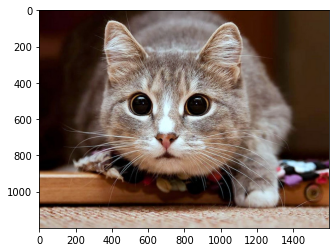

In [95]:
import matplotlib.pyplot as plt
from skimage import io

img = io.imread(PATH_TO_IMAGE)
plt.imshow(img)
plt.show()

Переведем исходную картинку в grayscale при помощи функции rgb2gray из skimage.color и посмотрим на результат.

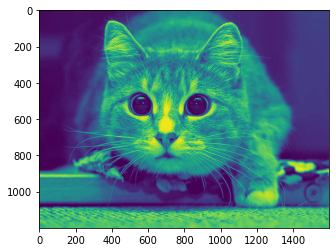

In [96]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray, rgba2rgb

img = rgb2gray(rgba2rgb(io.imread(PATH_TO_IMAGE)))
plt.imshow(img)
plt.show()

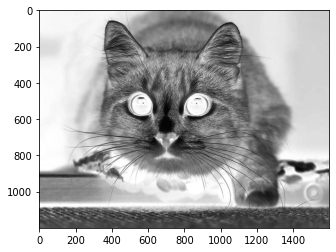

In [97]:
plt.imshow(img, cmap='binary')
plt.show()

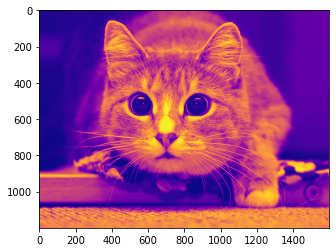

In [98]:
plt.imshow(img, cmap='plasma')
plt.show()

Ссылка на другие цветовые карты (cmap): https://matplotlib.org/stable/tutorials/colors/colormaps.html
## Scipy

SciPy — это библиотека Python с открытым исходным кодом, предназначенная для решения научных и математических проблем.
Она построена на базе NumPy и позволяет управлять данными, а также визуализировать их с помощью разных высокоуровневых команд.
Если вы импортируете SciPy, то NumPy отдельно импортировать не нужно.

Пример одномерной интерполяции

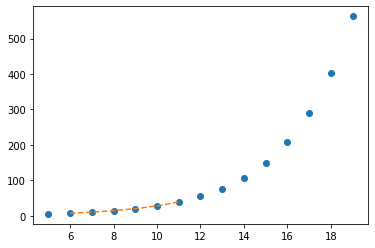

In [99]:
import matplotlib.pyplot as plt
from scipy import interpolate

x = np.arange(5, 20)
y = np.exp(x / 3.0)
f = interpolate.interp1d(x, y)
x1 = np.arange(6, 12)
y1 = f(x1)  # использовать функцию интерполяции, возвращаемую `interp1d`
plt.plot(x, y, 'o', x1, y1, '--')
plt.show()

Пример многомерной интерполяции

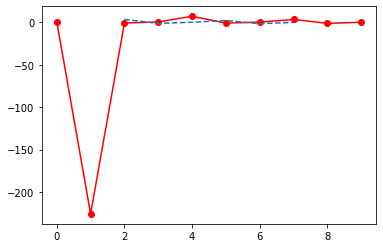

In [100]:
from scipy import interpolate
import matplotlib.pyplot as plt

x = np.arange(0, 10)
y = np.arange(10, 25)
x1, y1 = np.meshgrid(x, y)
z = np.tan(x1 + y1)
f = interpolate.interp2d(x, y, z, kind='cubic')
x2 = np.arange(2, 8)
y2 = np.arange(15, 20)
z2 = f(x2, y2)
plt.plot(x, z[0, :], 'ro-', x2, z2[0, :], '--')
plt.show()

Также в этой библиотеке есть модуль по линейной алгебре
Рассмотрим получение обратной матрицы

In [101]:
import numpy as np
from scipy import linalg

A = np.array([[1, 2], [4, 3]])
B = linalg.inv(A)
print(B)

[[-0.6  0.4]
 [ 0.8 -0.2]]


Также тут присутствует и возможность расчета определителя матрицый

In [102]:
import numpy as np
from scipy import linalg

A = np.array([[1, 2], [4, 3]])
B = linalg.det(A)
print(B)

-5.0


___
# Домашняя работа
__*(данные задания должны быть выполнены в этом блокноте)*__

1. Создайте массив 9х9 из нулей.
Заполните его квадратами 3х3, состоящими из одинаковых цифр от 1 до 9.
Массив 3х3, расположенный на первых трех строка и столбцах должен выглядеть так:
```python
[[1, 1, 1],
[1, 1, 1],
[1, 1, 1]]
```
2. Создайте массив Numpy под названием `a` размером 5x2, то есть состоящий из 5 строк и 2 столбцов.
Первый столбец должен содержать числа `1, 2, 3, 3, 1`, а второй - числа `6, 8, 11, 10, 7`.
Будем считать, что каждый столбец - это признак, а строка - наблюдение.
Затем найдите среднее значение по каждому признаку, используя метод `mean` массива numpy.
Результат запишите в массив `mean_a`, в нем должно быть 2 элемента.
3. Есть функции y=sin(x) и y=cos(x). Постройте в одной координатной плоскости четыре графика:
    * y=sin(x)
    * y=cos(x)
    * y=sin(x) - cos(x)
    * y=sin(x) + cos(x)
4. Постройте графики из задачи 3 в отдельных координатных плоскостях, но на одном рисунке.